In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The Compile method](#coding_tutorial_3)
 #### [4. The Fit Method](#coding_tutorial_4)
 #### [5. The Evaluate and Predict Methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

In [4]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16, (3,3), padding='SAME', strides=2, activation='relu', input_shape=(28, 28, 1), data_format='channels_last'),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [7]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 17,258
Trainable params: 17,258
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Define the model optimizer, loss function and metrics

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy', 'mae'])

In [9]:
# Print the resulting model attributes

print(model.optimizer)
print(model.loss)
print(model.metrics)

sparse_categorical_crossentropy
[]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [11]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [12]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [13]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [14]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.

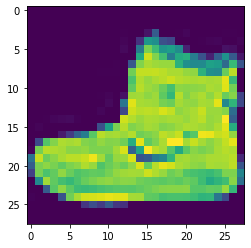

label: Ankle boot


In [15]:
# Display one of the images

i = 0
plt.imshow(train_images[i,:,:])
plt.show()
print(f"label: {labels[train_labels[i]]}")

#### Fit the model

In [16]:
# Fit the model

history = model.fit(train_images[...,np.newaxis], train_labels, epochs = 20, batch_size=256, verbose=2)

Epoch 1/20
235/235 - 2s - loss: 0.9802 - accuracy: 0.6723 - mae: 4.4200
Epoch 2/20
235/235 - 2s - loss: 0.5870 - accuracy: 0.7815 - mae: 4.4200
Epoch 3/20
235/235 - 2s - loss: 0.5211 - accuracy: 0.8091 - mae: 4.4200
Epoch 4/20
235/235 - 2s - loss: 0.4837 - accuracy: 0.8260 - mae: 4.4200
Epoch 5/20
235/235 - 2s - loss: 0.4585 - accuracy: 0.8351 - mae: 4.4200
Epoch 6/20
235/235 - 2s - loss: 0.4373 - accuracy: 0.8421 - mae: 4.4200
Epoch 7/20
235/235 - 2s - loss: 0.4205 - accuracy: 0.8481 - mae: 4.4200
Epoch 8/20
235/235 - 2s - loss: 0.4084 - accuracy: 0.8515 - mae: 4.4200
Epoch 9/20
235/235 - 2s - loss: 0.3951 - accuracy: 0.8565 - mae: 4.4200
Epoch 10/20
235/235 - 2s - loss: 0.3843 - accuracy: 0.8613 - mae: 4.4200
Epoch 11/20
235/235 - 2s - loss: 0.3782 - accuracy: 0.8638 - mae: 4.4200
Epoch 12/20
235/235 - 2s - loss: 0.3708 - accuracy: 0.8661 - mae: 4.4200
Epoch 13/20
235/235 - 2s - loss: 0.3645 - accuracy: 0.8679 - mae: 4.4200
Epoch 14/20
235/235 - 2s - loss: 0.3600 - accuracy: 0.8676 -

#### Plot training history

In [17]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,mae
0,0.980206,0.672317,4.420001
1,0.587013,0.781517,4.420001
2,0.521142,0.809133,4.420000
3,0.483739,0.826050,4.420000
4,0.458514,0.835133,4.420000


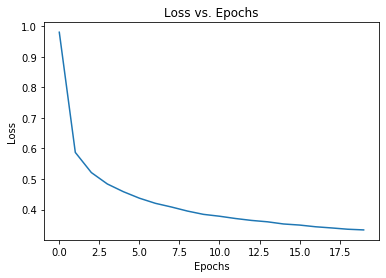

In [18]:
# Make a plot for the loss

loss_plot = df.plot(y="loss", title="Loss vs. Epochs", legend=False)
loss_plot.set(xlabel='Epochs', ylabel="Loss");

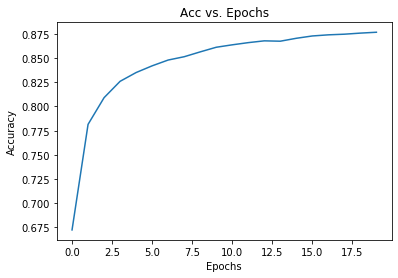

In [19]:
# Make a plot for the accuracy

acc_plot = df.plot(y="accuracy", title="Acc vs. Epochs", legend=False)
acc_plot.set(xlabel='Epochs', ylabel="Accuracy");

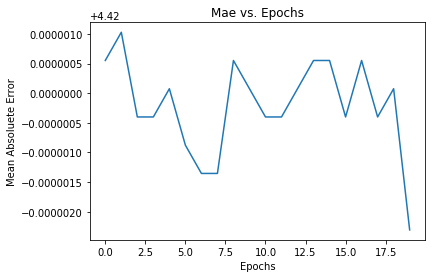

In [20]:
# Make a plot for the additional metric

mae_plot = df.plot(y="mae", title="Mae vs. Epochs", legend=False)
mae_plot.set(xlabel='Epochs', ylabel="Mean Absoluete Error");

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [21]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [22]:
# Evaluate the model

model.evaluate(test_images[...,np.newaxis], test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3746 - accuracy: 0.8632 - mae: 4.4200


[0.37455272674560547, 0.8632000088691711, 4.419997215270996]

#### Make predictions from the model

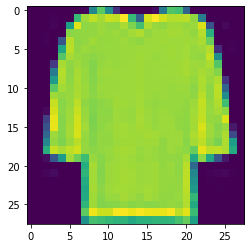

Label: Pullover


In [23]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [24]:
# Get the model predictions

predictions = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model Prediction: {labels[np.argmax(predictions)]}")

Model Prediction: Shirt
